# <font color=blue>Assignments for "Data Exploration - Multivariate Analysis"</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In this assignment, you will work on the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

**(1)** Does the performance in the exams vary according to gender, origin and education level of parents?

In [4]:
cols =['gender', 'race/ethnicity', 'parental level of education']

for col in cols:
    display(df.groupby(col)[['total_score']].mean())

,total_score
gender,
female,69.569498
male,65.837483


,total_score
race/ethnicity,
group A,62.992509
group B,65.468421
group C,67.131661
group D,69.179389
group E,72.752381


,total_score
parental level of education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007


In [5]:
# normality assumption

test_stat, pvalue = shapiro(df.loc[df['gender'] == 'female', "total_score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df['gender'] == 'male', 'total_score'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9858, p-value = 0.0001
Test Stat = 0.9941, p-value = 0.0577


In [6]:
#variance homogeneity assumption

test_stat, pvalue = levene(df.loc[df['gender'] == 'female', "total_score"],
                           df.loc[df['gender'] == 'male', "total_score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.1345, p-value = 0.7139


In [7]:
test_stat, pvalue = mannwhitneyu(df.loc[df['gender'] == 'female', "total_score"],
                                 df.loc[df['gender'] == 'male', "total_score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 144766.0000, p-value = 0.0000


In [8]:
# Since p<0.05, There is a statistically significant difference between the achievements of male and female students.

In [9]:
for group in list(df['race/ethnicity'].unique()):
    pvalue = shapiro(df.loc[df['race/ethnicity'] == group, "total_score"])[1]
    print(group, 'p-value: %.4f' % pvalue)

group B p-value: 0.0199
group C p-value: 0.0187
group A p-value: 0.5323
group D p-value: 0.1989
group E p-value: 0.0804


In [10]:
test_stat, pvalue = levene(df.loc[df['race/ethnicity'] == 'group A', 'total_score'],
                           df.loc[df['race/ethnicity'] == 'group B', 'total_score'],
                           df.loc[df['race/ethnicity'] == 'group C', 'total_score'],
                           df.loc[df['race/ethnicity'] == 'group D', 'total_score'],
                           df.loc[df['race/ethnicity'] == 'group E', 'total_score'])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.5509, p-value = 0.6984


In [11]:
test_stat, pvalue = kruskal(df.loc[df['race/ethnicity'] == 'group A', 'total_score'],
                            df.loc[df['race/ethnicity'] == 'group B', 'total_score'],
                            df.loc[df['race/ethnicity'] == 'group C', 'total_score'],
                            df.loc[df['race/ethnicity'] == 'group D', 'total_score'],
                            df.loc[df['race/ethnicity'] == 'group E', 'total_score'])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 36.1764, p-value = 0.0000


In [12]:
# There is a statistically significant difference between the success of the groups.

In [13]:
for group in list(df['parental level of education'].unique()):
    pvalue = shapiro(df.loc[df['parental level of education'] == group, "total_score"])[1]
    print(group, 'p-value: %.4f' % pvalue)

bachelor's degree p-value: 0.3399
some college p-value: 0.0510
master's degree p-value: 0.2305
associate's degree p-value: 0.1102
high school p-value: 0.1053
some high school p-value: 0.0085


In [14]:
test_stat, pvalue = levene(df.loc[df['parental level of education'] == "associate's degree", 'total_score'],
                           df.loc[df['parental level of education'] == "bachelor's degree", 'total_score'],
                           df.loc[df['parental level of education'] == 'high school', 'total_score'],
                           df.loc[df['parental level of education'] == "master's degree", 'total_score'],
                           df.loc[df['parental level of education'] == 'some college', 'total_score'],
                           df.loc[df['parental level of education'] == 'some high school', 'total_score'])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.5085, p-value = 0.7700


In [15]:
test_stat, pvalue = kruskal(df.loc[df['parental level of education'] == "associate's degree", 'total_score'],
                           df.loc[df['parental level of education'] == "bachelor's degree", 'total_score'],
                           df.loc[df['parental level of education'] == 'high school', 'total_score'],
                           df.loc[df['parental level of education'] == "master's degree", 'total_score'],
                           df.loc[df['parental level of education'] == 'some college', 'total_score'],
                           df.loc[df['parental level of education'] == 'some high school', 'total_score'])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 44.7284, p-value = 0.0000


In [16]:
# There is a statistically significant difference between the success of the degrees.

**(2)** Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [17]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
# normality assumption

test_stat, pvalue = shapiro(df.loc[df['lunch'] == 'standard', "total_score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df['lunch'] == 'free/reduced', 'total_score'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9943, p-value = 0.0164
Test Stat = 0.9924, p-value = 0.0660


In [19]:
#variance homogeneity assumption

test_stat, pvalue = levene(df.loc[df['lunch'] == 'standard', "total_score"],
                           df.loc[df['lunch'] == 'free/reduced', "total_score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 3.5494, p-value = 0.0599


In [20]:
test_stat, pvalue = mannwhitneyu(df.loc[df['lunch'] == 'standard', "total_score"],
                           df.loc[df['lunch'] == 'free/reduced', "total_score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 152822.0000, p-value = 0.0000


In [21]:
df.groupby('lunch')[['total_score']].mean()

,total_score
lunch,
free/reduced,62.199061
standard,70.837209


In [22]:
# Lunch types have a statistically significant effect on exam success. 
# Groups that eat standard food are more successful.

**(3)** Does the preparation courses have an impact on exam performance?

In [23]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [24]:
test_stat, pvalue = shapiro(df.loc[df['test preparation course'] == 'none', "total_score"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df['test preparation course'] == 'completed', 'total_score'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9937, p-value = 0.0090
Test Stat = 0.9908, p-value = 0.0244


In [25]:
test_stat, pvalue = mannwhitneyu(df.loc[df['test preparation course'] == 'none', "total_score"],
                                 df.loc[df['test preparation course'] == 'completed', "total_score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 79516.5000, p-value = 0.0000


In [26]:
# Since p < 0.05, the preparation courses have an impact on exam performance.

**(4)** Which lessons are most correlated with each other?

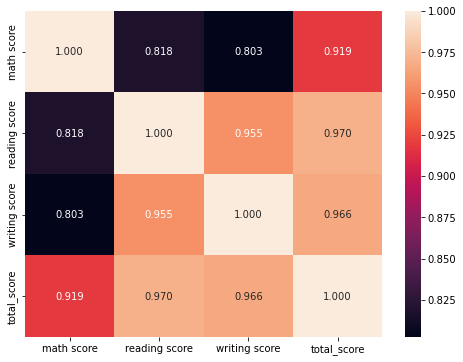

In [27]:
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.show()